In [457]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

In [458]:
closed_data = pd.DataFrame(pd.read_csv('/Users/anubhgar/Downloads/olist_dataset/olist_closed_deals_dataset.csv', parse_dates = ['won_date']))
closed_data.head(5) 

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [459]:
# we will drop the columns having more than 70% NA values.

closed_data = closed_data.drop(closed_data.loc[:,list(round(100*(closed_data.isnull().sum()/len(closed_data.index)), 2)>70)].columns, 1)

In [460]:
mql_data = pd.DataFrame(pd.read_csv('/Users/anubhgar/Downloads/olist_dataset/olist_marketing_qualified_leads_dataset.csv', parse_dates = ['first_contact_date']))
mql_data.head(5) 

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [461]:
closed_data['business_type'] = closed_data['business_type'].replace(np.nan, 'reseller')
closed_data['lead_behaviour_profile'] = closed_data['lead_behaviour_profile'].replace(np.nan, 'cat')
closed_data['lead_type'] = closed_data['lead_type'].replace(np.nan, 'online_medium')
closed_data = closed_data.drop(['declared_monthly_revenue'],1)

In [462]:
mf = mql_data.merge(closed_data, on='mql_id', how='inner')
mf.head()


,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,cat,reseller
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer


In [463]:
mf2 = mql_data.merge(closed_data, on='mql_id', how='left').where(~mql_data['mql_id'].isin(closed_data['mql_id']))
mf2 = mf2[mf2['mql_id'].notna()]
mf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 7998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   mql_id                  7158 non-null   object        
 1   first_contact_date      7158 non-null   datetime64[ns]
 2   landing_page_id         7158 non-null   object        
 3   origin                  7112 non-null   object        
 4   seller_id               0 non-null      object        
 5   sdr_id                  0 non-null      object        
 6   sr_id                   0 non-null      object        
 7   won_date                0 non-null      datetime64[ns]
 8   business_segment        0 non-null      object        
 9   lead_type               0 non-null      object        
 10  lead_behaviour_profile  0 non-null      object        
 11  business_type           0 non-null      object        
dtypes: datetime64[ns](2), object(10)
memory usage: 7

In [464]:
mf = pd.concat([mf,mf2[0:7157]], axis=0)
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 0 to 7997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   mql_id                  7999 non-null   object        
 1   first_contact_date      7999 non-null   datetime64[ns]
 2   landing_page_id         7999 non-null   object        
 3   origin                  7939 non-null   object        
 4   seller_id               842 non-null    object        
 5   sdr_id                  842 non-null    object        
 6   sr_id                   842 non-null    object        
 7   won_date                842 non-null    datetime64[ns]
 8   business_segment        841 non-null    object        
 9   lead_type               842 non-null    object        
 10  lead_behaviour_profile  842 non-null    object        
 11  business_type           842 non-null    object        
dtypes: datetime64[ns](2), object(10)
memory usage: 8

In [465]:
mf['MQL_created_month'] = mf['first_contact_date'].dt.to_period('M')
mf['Closed_Won_month'] = mf['won_date'].dt.to_period('M')

# Create column that calculates 'days to convert' from MQL to Won
mf['days_from_MQL_close'] = (mf['won_date'] - mf['first_contact_date']).dt.days
mf['Converted'] = mf['mql_id'].isin(closed_data['mql_id']).astype('int')


In [466]:
mf.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,MQL_created_month,Closed_Won_month,days_from_MQL_close,Converted
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,2018-02,2018-02,5.0,1
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,2018-04,2018-05,34.0,1
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,2018-04,2018-06,63.0,1
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,cat,reseller,2018-01,2018-01,3.0,1
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,2017-10,2018-07,267.0,1


In [467]:
mf = mf.drop(['first_contact_date','won_date'], axis=1)

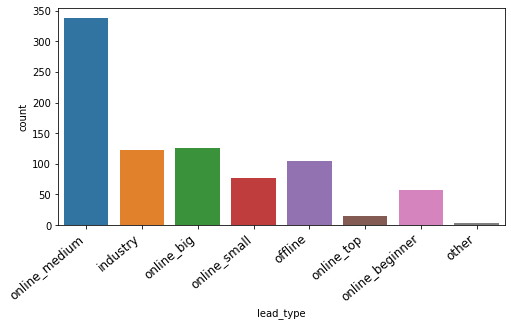

In [468]:
plt.figure(figsize=(8,4))
ax= sns.countplot(mf['lead_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

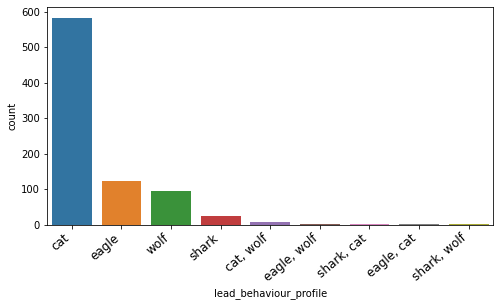

In [469]:
plt.figure(figsize=(8,4))
ax= sns.countplot(mf['lead_behaviour_profile'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

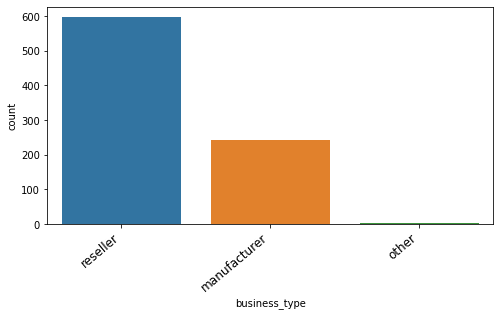

In [470]:
plt.figure(figsize=(8,4))
ax= sns.countplot(mf['business_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

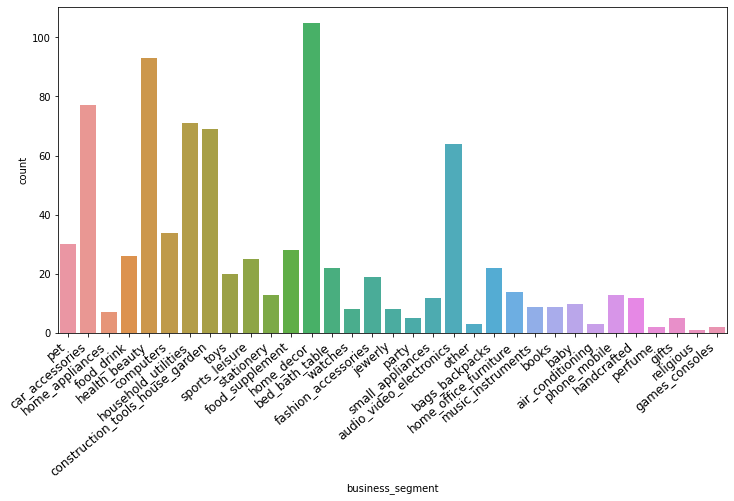

In [471]:
plt.figure(figsize=(12,6))
ax= sns.countplot(mf['business_segment'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

In [472]:
mf['business_segment'].describe()

count            841
unique            33
top       home_decor
freq             105
Name: business_segment, dtype: object

In [473]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 0 to 7997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   mql_id                  7999 non-null   object   
 1   landing_page_id         7999 non-null   object   
 2   origin                  7939 non-null   object   
 3   seller_id               842 non-null    object   
 4   sdr_id                  842 non-null    object   
 5   sr_id                   842 non-null    object   
 6   business_segment        841 non-null    object   
 7   lead_type               842 non-null    object   
 8   lead_behaviour_profile  842 non-null    object   
 9   business_type           842 non-null    object   
 10  MQL_created_month       7999 non-null   period[M]
 11  Closed_Won_month        842 non-null    period[M]
 12  days_from_MQL_close     842 non-null    float64  
 13  Converted               7999 non-null   int64    
dtypes: float

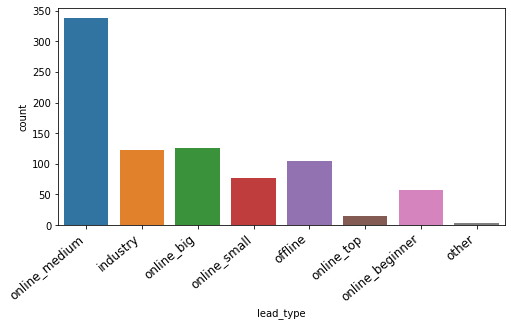

In [474]:
plt.figure(figsize=(8,4))
ax= sns.countplot(mf['lead_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()


In [475]:
fill_profile = ['cat', 'eagle', 'wolf', 'cat,wolf']

In [476]:
fill_segment = ['household_utilities', 'home_decor', 'stationery']

In [477]:
fill_business = ['reseller', 'manufacturer']

In [478]:
fill_type = ['online_medium', 'industry', 'online_big', 'online_small', 'online_beginner']


In [479]:
mf["lead_type"] = mf["lead_type"].fillna(pd.Series(np.random.choice(fill_type, size=len(mf.index))))


In [480]:
mf["lead_behaviour_profile"] = mf["lead_behaviour_profile"].fillna(pd.Series(np.random.choice(fill_profile, size=len(mf.index))))

In [481]:
mf["business_type"] = mf["business_type"].fillna(pd.Series(np.random.choice(fill_business, size=len(mf.index))))


In [482]:

mf["business_segment"] = mf["business_segment"].fillna(pd.Series(np.random.choice(fill_segment, size=len(mf.index))))



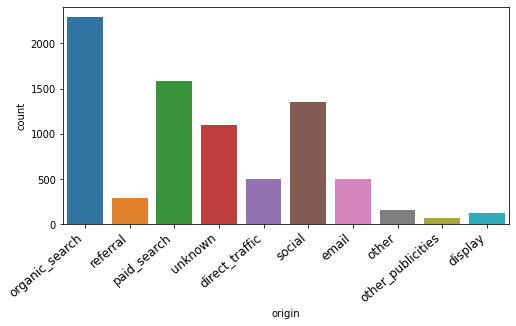

In [483]:
plt.figure(figsize=(8,4))
ax= sns.countplot(mf['origin'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

In [484]:
mf['origin'] = mf['origin'].replace(np.nan, 'organic_search')

In [485]:
mf['Closed_Won_month'] = mf['Closed_Won_month'].replace(np.nan, 'None')

In [486]:
mf['days_from_MQL_close'] = mf['days_from_MQL_close'].replace(np.nan, np.int64(100000))

In [487]:
mf = mf.drop(['seller_id'], axis=1)

In [488]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 0 to 7997
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   mql_id                  7999 non-null   object   
 1   landing_page_id         7999 non-null   object   
 2   origin                  7999 non-null   object   
 3   sdr_id                  842 non-null    object   
 4   sr_id                   842 non-null    object   
 5   business_segment        7999 non-null   object   
 6   lead_type               7999 non-null   object   
 7   lead_behaviour_profile  7999 non-null   object   
 8   business_type           7999 non-null   object   
 9   MQL_created_month       7999 non-null   period[M]
 10  Closed_Won_month        7999 non-null   object   
 11  days_from_MQL_close     7999 non-null   float64  
 12  Converted               7999 non-null   int64    
dtypes: float64(1), int64(1), object(10), period[M](1)
memory usage:

In [489]:
mf['sdr_id'] = mf['sdr_id'].replace(np.nan, 'None')

In [490]:
mf['sr_id'] = mf['sr_id'].replace(np.nan, 'None')

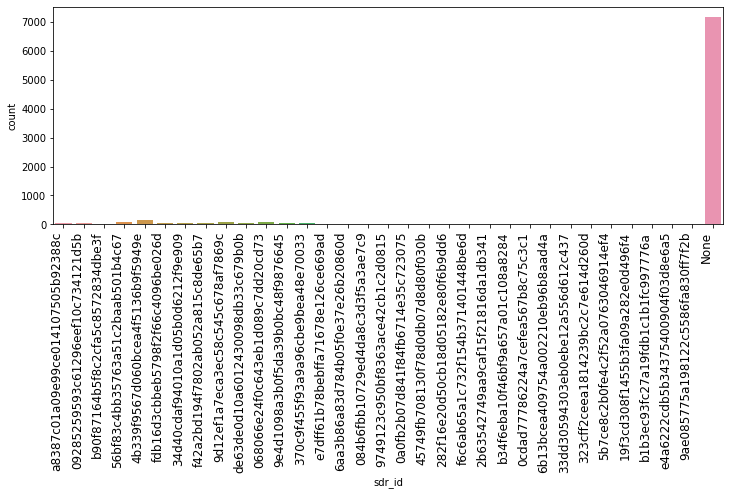

In [491]:
plt.figure(figsize=(12,4))
ax= sns.countplot(mf['sdr_id'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=12)
plt.show()

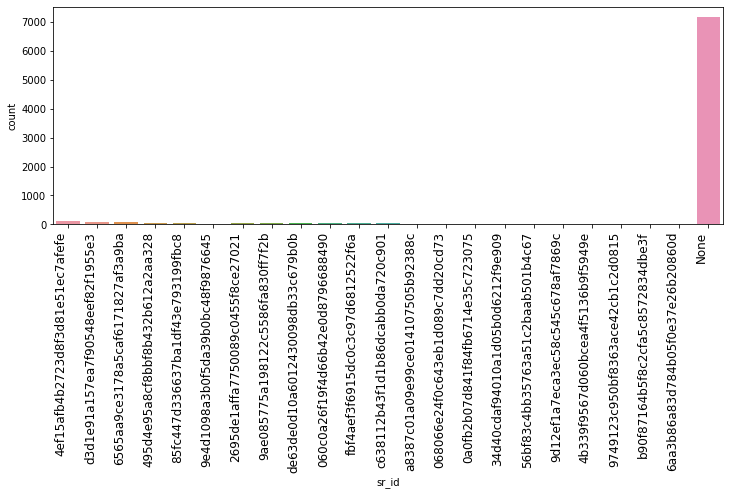

In [492]:
plt.figure(figsize=(12,4))
ax= sns.countplot(mf['sr_id'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=12)
plt.show()

In [493]:
#mf_dummy = pd.get_dummies(mf[[ 'business_segment','lead_type','lead_behaviour_profile', 'business_type', 'origin']])

In [494]:
mf.to_csv('merged_olist.csv')

In [495]:
#mf_data = pd.concat([mf, mf_dummy], axis=1)
#mf_data.head()

from sklearn import preprocessing
column_list = ['business_segment','lead_type','lead_behaviour_profile', 'business_type','landing_page_id','origin']

for column in column_list:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(mf[column])
    mf[column] = encoder.transform(mf[column])
    

In [496]:
mf.head()

,mql_id,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,MQL_created_month,Closed_Won_month,days_from_MQL_close,Converted
0,5420aad7fec3549a85876ba1c529bd84,345,3,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,25,4,0,2,2018-02,2018-02,5.0,1
1,a555fb36b9368110ede0f043dfc3b9a0,75,7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,6,0,3,2,2018-04,2018-05,34.0,1
2,327174d3648a2d047e8940d7d15204ca,46,3,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,16,3,0,2,2018-04,2018-06,63.0,1
3,f5fee8f7da74f4887f5bcae2bafb6dd6,61,6,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,10,5,0,2,2018-01,2018-01,3.0,1
4,ffe640179b554e295c167a2f6be528e0,308,9,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,16,0,9,0,2017-10,2018-07,267.0,1


In [497]:
from sklearn.model_selection import train_test_split

features = column_list
target = ['Converted']

X = mf[features].values
y = mf[target].values
split_test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6799, 6)
Training Labels Shape: (1200, 6)
Testing Features Shape: (6799, 1)
Testing Labels Shape: (1200, 1)


In [499]:
#mf_data.head()

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf_model_leadclose = RandomForestRegressor(n_estimators=50, min_samples_split=2, random_state = 8)
rf_model_leadclose.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(n_estimators=50, random_state=8)

In [500]:
from sklearn.metrics import mean_absolute_error
rf_predict_train = rf_model_leadclose.predict(X_train)
rf_predict_test = rf_model_leadclose.predict(X_test)

print("Mean Absolute error in predicting (Training):-",mean_absolute_error(y_train,rf_predict_train))
print("Mean Absolute error in predicting (Testing):-",mean_absolute_error(y_test,rf_predict_test))

Mean Absolute error in predicting (Training):- 0.02194057206459766
Mean Absolute error in predicting (Testing):- 0.04318763098013098


In [501]:
Converted = (sum(mf['Converted'])/len(mf['Converted'].index))*100
Converted

10.526315789473683

In [502]:
from sklearn.linear_model import LogisticRegression

In [503]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [504]:
# Logistic regression model
clf.score(X_test, y_test)


0.9341666666666667

In [505]:
from joblib import dump

In [506]:
dump(rf_model_leadclose, 'model.joblib')

['model.joblib']